3.	Import the required packages with their customary aliases as follows:

    `import pandas as pd`   
    `import numpy as np`  
    `import matplotlib.pyplot as plt`  
    `import seaborn as sns`
    
4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

5. How many rows and columns are in `gdp_df`? What are the data types of each column?

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?
9. What was the median GDP per capita value in 2020?

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

11. Which country was the first to have a GDP per capita greater than $100,000?

12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

16. Look at the number of observations in this dataset per year. What do you notice?

17. What is the first year to have a non-zero internet users percentage value?

18. How does the distribution of internet users percent differ for 2000 and 2014?

19. For how many countries was the percentage of internet users below 5% in 2014?

20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

### Bonus exercise:
1.    Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.


In [1]:
import pandas as pd   
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')



In [3]:
print(gdp_df.head)
print(gdp_df.info)

<bound method NDFrame.head of      Country or Area  Year        Value  Value Footnotes
0        Afghanistan  2021  1517.016266              NaN
1        Afghanistan  2020  1968.341002              NaN
2        Afghanistan  2019  2079.921861              NaN
3        Afghanistan  2018  2060.698973              NaN
4        Afghanistan  2017  2096.093111              NaN
...              ...   ...          ...              ...
7657        Zimbabwe  1994  2670.106615              NaN
7658        Zimbabwe  1993  2458.783255              NaN
7659        Zimbabwe  1992  2468.278257              NaN
7660        Zimbabwe  1991  2781.787843              NaN
7661        Zimbabwe  1990  2704.757299              NaN

[7662 rows x 4 columns]>
<bound method DataFrame.info of      Country or Area  Year        Value  Value Footnotes
0        Afghanistan  2021  1517.016266              NaN
1        Afghanistan  2020  1968.341002              NaN
2        Afghanistan  2019  2079.921861              NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?
Answer: 7662 rows , 4 columns  -- String, Integer, Float, String

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [4]:
gdp_df = pd.read_csv("../data/gdp_percapita.csv", usecols=["Country or Area", "Year", "Value"])

In [5]:
rename_dict = {
    'Country or Area': 'Country',
    'Value': 'GDP_Per_Capita'
}


gdp_df.rename(columns=rename_dict, inplace=True)

7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [6]:
country_year = gdp_df.groupby(['Country'])['Year'].count() == 33
print(country_year)

Country
Afghanistan                    False
Africa Eastern and Southern     True
Africa Western and Central      True
Albania                         True
Algeria                         True
                               ...  
Viet Nam                        True
West Bank and Gaza             False
World                           True
Zambia                          True
Zimbabwe                        True
Name: Year, Length: 242, dtype: bool


In [7]:
countries_missing_many_years = observations_per_country[observations_per_country < total_years]
print(countries_missing_many_years)


NameError: name 'observations_per_country' is not defined

In [8]:
unique_years = gdp_df['Year'].nunique()

print(unique_years)

observations_per_country = gdp_df.groupby('Country')['Year'].nunique()

print(observations_per_country)

countries_with_all_years = observations_per_country[observations_per_country == unique_years]

print(countries_with_all_years)

countries_missing_many_years = observations_per_country[observations_per_country < unique_years]

print(countries_missing_many_years)

observations_per_year = gdp_df.groupby('Year').size()

print(observations_per_year)







33
Country
Afghanistan                    20
Africa Eastern and Southern    33
Africa Western and Central     33
Albania                        33
Algeria                        33
                               ..
Viet Nam                       33
West Bank and Gaza             29
World                          33
Zambia                         33
Zimbabwe                       33
Name: Year, Length: 242, dtype: int64
Country
Africa Eastern and Southern    33
Africa Western and Central     33
Albania                        33
Algeria                        33
Angola                         33
                               ..
Vanuatu                        33
Viet Nam                       33
World                          33
Zambia                         33
Zimbabwe                       33
Name: Year, Length: 202, dtype: int64
Country
Afghanistan                  20
Aruba                        32
Bhutan                       32
Bosnia and Herzegovina       29
Cambodia             

7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [9]:
observations_per_country = gdp_df.groupby('Country')['Year'].nunique()



countries_missing_many_years = observations_per_country[observations_per_country < unique_years]

count_countries_with_all_years = countries_with_all_years.count()
count_countries_missing_many_years = countries_missing_many_years.count()
print("Number of countries with data for all years:", count_countries_with_all_years)
print("Number of countries missing more than one year of data:", count_countries_missing_many_years)


Number of countries with data for all years: 202
Number of countries missing more than one year of data: 40


8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

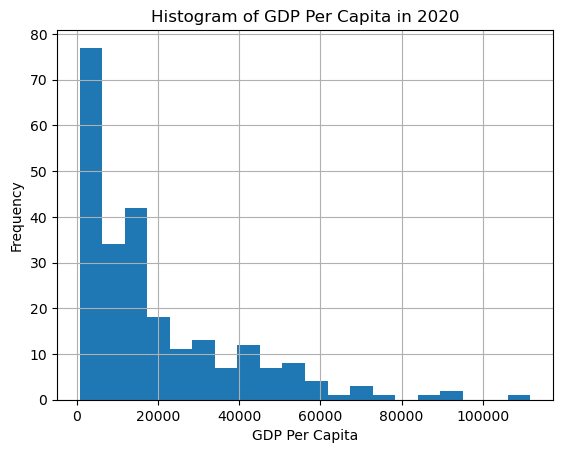

In [10]:
#create dataframe for only the year we're looking at
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]
# plotting my histogram
gdp_2020['GDP_Per_Capita'].hist(bins=20)  
plt.title('Histogram of GDP Per Capita in 2020')
plt.xlabel('GDP Per Capita')
plt.ylabel('Frequency')
plt.show()



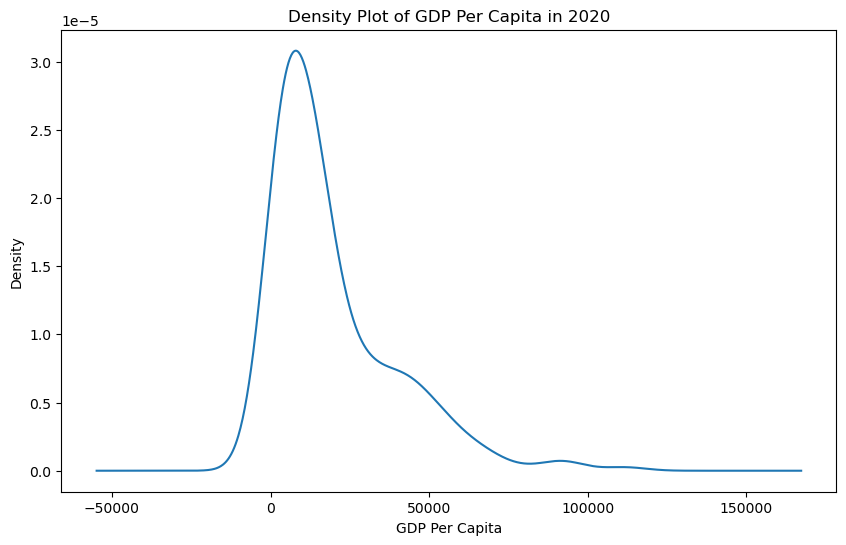

In [11]:
# I forgot to define df_2020 again since this is in a new box. Remember new box, new definitions
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]
# Density Plot
plt.figure(figsize=(10, 6)) 
gdp_2020['GDP_Per_Capita'].plot(kind='density')
plt.title('Density Plot of GDP Per Capita in 2020')
plt.xlabel('GDP Per Capita')
plt.ylabel('Density')
plt.show()


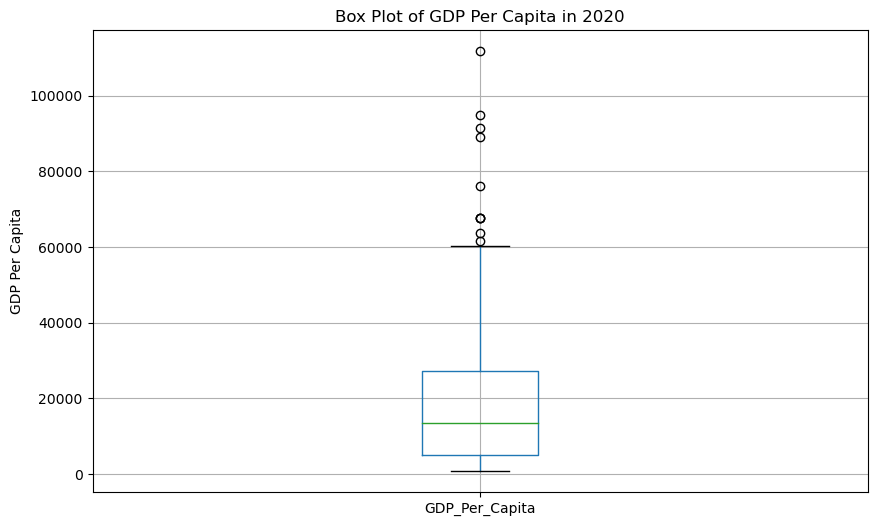

In [12]:
# now, a box plot. remembering I need to define my variables again.
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]
plt.figure(figsize=(10, 6))
gdp_2020.boxplot(column='GDP_Per_Capita')  
plt.title('Box Plot of GDP Per Capita in 2020')
plt.ylabel('GDP Per Capita')
plt.show()

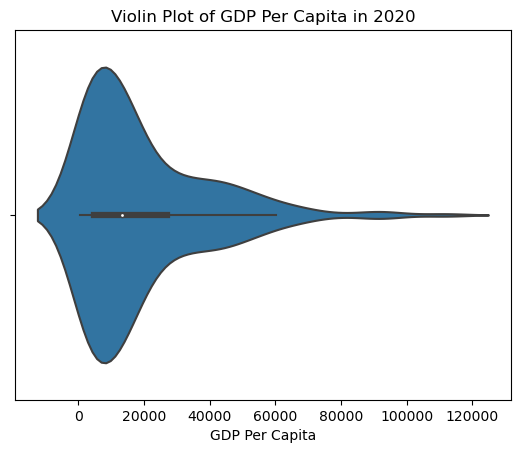

In [13]:
# Violin plot using seaborn
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]
sns.violinplot(data=gdp_2020, x='GDP_Per_Capita')
plt.title('Violin Plot of GDP Per Capita in 2020')
plt.xlabel('GDP Per Capita')
plt.show()


8 Cont. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

Answwer: Most of the gpd per capitas were between 0 - 20,000, boxplot doesn't seem to show the weightings of the distirbutions themselves, just the distribution/range of values.

9. What was the median GDP per capita value in 2020?

In [14]:


# First filter for 2020
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]

# Next I'm finding median 
median_gdp_2020 = gdp_2020['GDP_Per_Capita'].median()

print("The median GDP per capita in 2020 is:", median_gdp_2020)


The median GDP per capita in 2020 is: 13357.997573370474


9. Answer: The median GDP per capita in 2020 is: 13357.997573370474

In [15]:
10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020.
Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades.
Using this, create the following 4 plots:

A boxplot
A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
A scatterplot
A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

SyntaxError: unterminated string literal (detected at line 1) (2427387181.py, line 1)

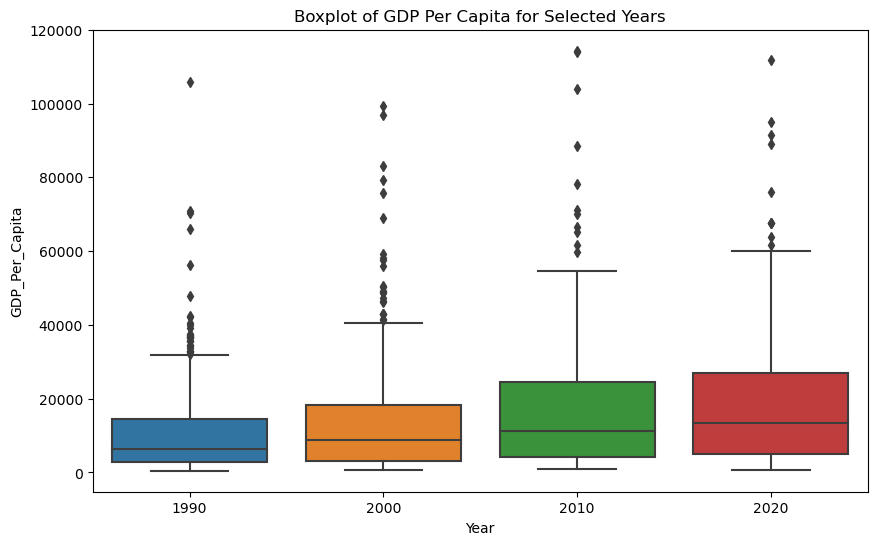

In [16]:

#10A. Create new data frame with only the years
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]
#10B Box Plot

plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='GDP_Per_Capita', data=gdp_decades)
plt.title('Boxplot of GDP Per Capita for Selected Years')
plt.show()





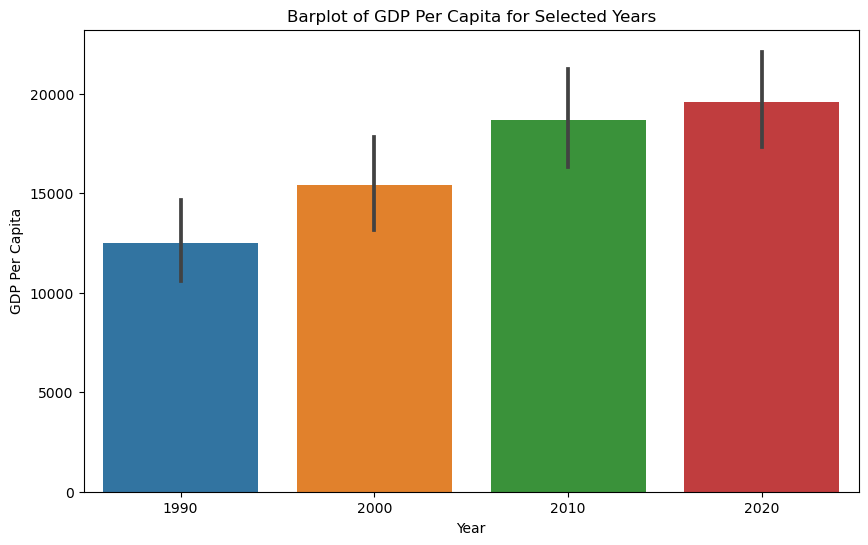

In [17]:
#10C Barplot 
plt.figure(figsize=(10, 6))  # Sets the figure size
sns.barplot(x='Year', y='GDP_Per_Capita', data=gdp_decades)
plt.title('Barplot of GDP Per Capita for Selected Years')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.show()

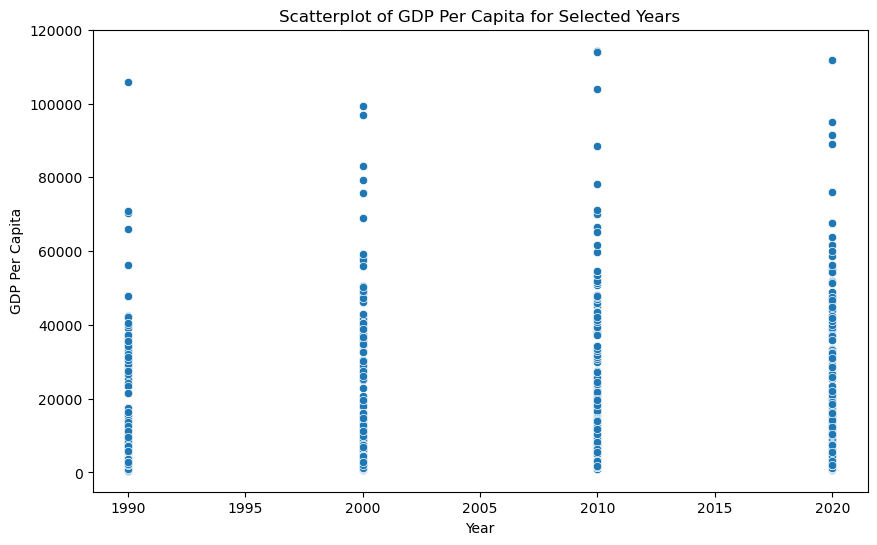

In [18]:
#10D Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='GDP_Per_Capita', data=gdp_decades)
plt.title('Scatterplot of GDP Per Capita for Selected Years')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.show()

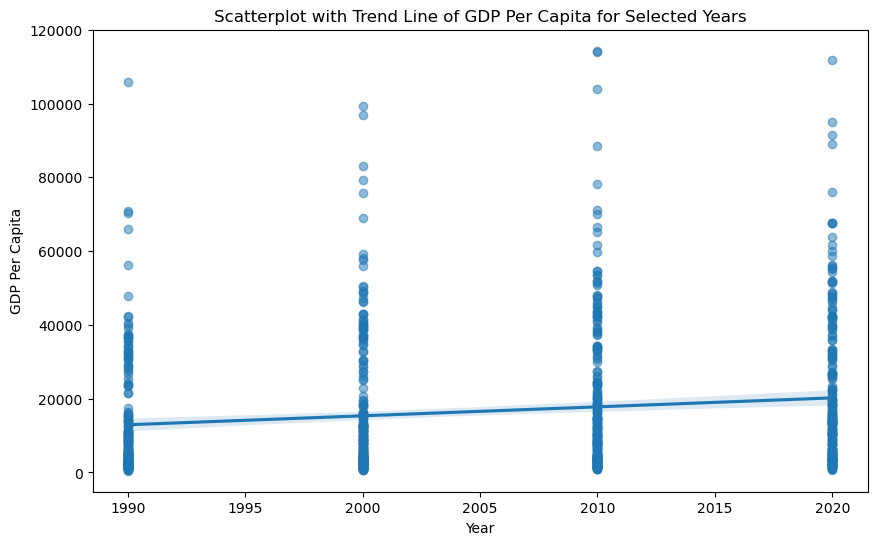

In [19]:
# 10E Scatterplot with trend line
plt.figure(figsize=(10, 6))
sns.regplot(x='Year', y='GDP_Per_Capita', data=gdp_decades, scatter_kws={'alpha':0.5})
plt.title('Scatterplot with Trend Line of GDP Per Capita for Selected Years')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.show()

Answer: The scatterplot alone was not super clear or easy to be able to tell the relative differences between the years, however with the trendline, you can tell that the general trend has been that the GDP per capita has been rising over the past 30 years. I actually found that the bar plot was the easiest to tell at a glance, as well as the differences between them were more apparent. The boxplot was... just fine. 

11. Which country was the first to have a GDP per capita greater than $100,000?

In [20]:

#11

# Filter for countries with a GDP per capita of greater than 100,000
filtered_100000 = gdp_df[gdp_df['GDP_Per_Capita'] > 100000]

# Sort the dataframe by year
sorted_by_year = filtered_100000.sort_values(by='Year')

# Who was first to 100,000?
first_country_greater = sorted_by_year.iloc[0]

print(f"The first country to have a GDP per capita greater than $100,000 was {first_country_greater['Country']} in the year {first_country_greater['Year']}.")


The first country to have a GDP per capita greater than $100,000 was United Arab Emirates in the year 1990.


#11. Answer: The first country to have a GDP per capita greater than $100,000 was United Arab Emirates in the year 1990.

12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

Luxembourg


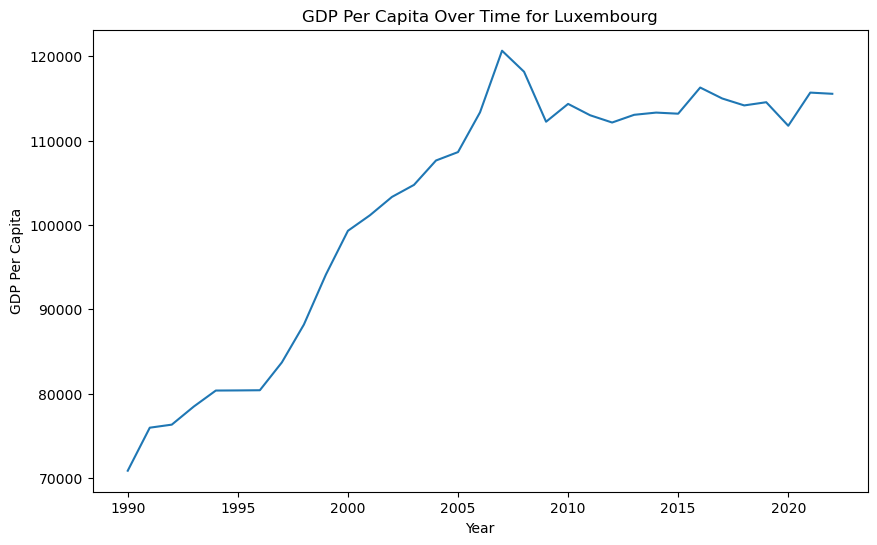

In [21]:
#12
# Which country had the highest gdp in 2020?
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]
highest_gdp_country = gdp_2020[gdp_2020['GDP_Per_Capita'] == gdp_2020['GDP_Per_Capita'].max()].iloc[0]['Country']
print(highest_gdp_country)
#Need to Extract Data for luxemborg
country_data = gdp_df[gdp_df['Country'] == highest_gdp_country]

# Making the plot 
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='GDP_Per_Capita', data=country_data)
plt.title(f'GDP Per Capita Over Time for {highest_gdp_country}')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.show()
# Answer: Luxembourg

#13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed 
over the timespan of the dataset. 
Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990?
Which countries had lower GDP per capita in 2020 than in 1990?

Burundi


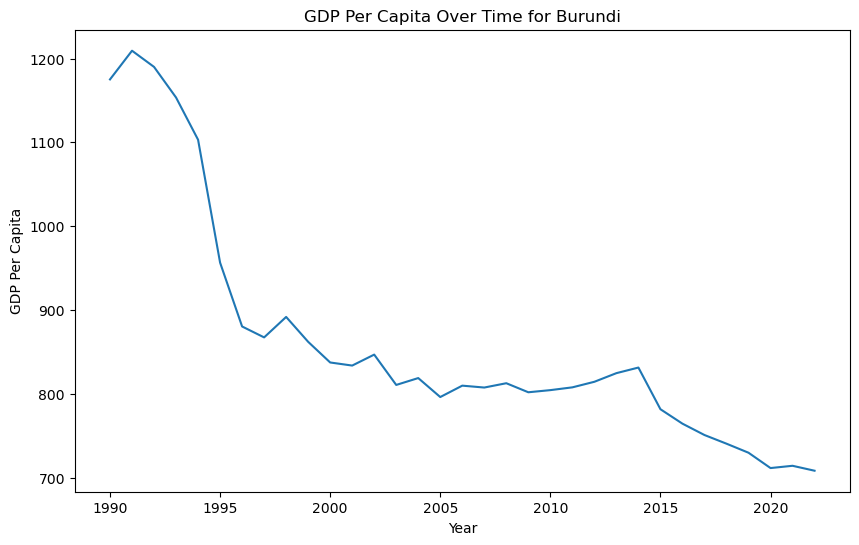

In [22]:
# 13. Which country has the lowest gdp per capita in 2020?
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]
lowest_gdp_country_2020 = gdp_2020[gdp_2020['GDP_Per_Capita'] == gdp_2020['GDP_Per_Capita'].min()].iloc[0]['Country']
print(lowest_gdp_country_2020)

#Answer: Burundi 

#  Extract Data for Burundi 
country_data = gdp_df[gdp_df['Country'] == lowest_gdp_country_2020]

# Lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='GDP_Per_Capita', data=country_data)
plt.title(f'GDP Per Capita Over Time for {lowest_gdp_country_2020}')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.show()

14.Read in the internet use dataset into a DataFrame named internet_df. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [23]:
#14
internet_df = pd.read_csv("F:/d10/Projects/gdp-and-internet-usage-seanmalley1/data/internet_use.csv")

In [38]:
#Answer: 14
print(internet_df.head())
print(internet_df.tail())


  Country or Area  Year     Value  Value Footnotes
0     Afghanistan  2014  6.390000              NaN
1     Afghanistan  2013  5.900000              NaN
2     Afghanistan  2012  5.454545              NaN
3     Afghanistan  2011  5.000000              NaN
4     Afghanistan  2010  4.000000              NaN
     Country or Area                                               Year  \
4658             163  Population age 6+. Slight break in comparabili...   
4659             164             Excluding game machine and digital TV.   
4660             165        Population age 16-74 in the last 12 months.   
4661             166  Estimated based on % of Internet users as repo...   
4662             167  Population age 15-59 who used the Internet in ...   

      Value  Value Footnotes  
4658    NaN              NaN  
4659    NaN              NaN  
4660    NaN              NaN  
4661    NaN              NaN  
4662    NaN              NaN  


15.Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [24]:
# 15a. drop value footnotes
internet_df = internet_df.drop(columns=['Value Footnotes'])


In [25]:
#15b.rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.
internet_df.rename(columns={'Country or Area': 'Country', 'Value': 'Internet_Users_Pct'}, inplace=True)
print(internet_df.head())


       Country  Year  Internet_Users_Pct
0  Afghanistan  2014            6.390000
1  Afghanistan  2013            5.900000
2  Afghanistan  2012            5.454545
3  Afghanistan  2011            5.000000
4  Afghanistan  2010            4.000000


16. Look at the number of observations in this dataset per year. What do you notice?

In [26]:
#16
#observations_per_year = internet_df.groupby('Year').size()

#print(observations_per_year)

# well that didn't work. I'm going to see how many unique countries per year were measured, 
#since it looks like only one country per year is listed

unique_countries_per_year = internet_df.groupby('Year')['Country'].nunique()
print(unique_countries_per_year)

# that didn't work either. 
#entries_per_year = internet_df.groupby('Year').size()
#print(entries_per_year)

#I'm going to see what happens when I exclude the footnotes. 

Year
1960      7
1965      7
1970      7
1975      7
1976      7
1977      7
1978      7
1979      7
1980      7
1981      7
1982      7
1983      7
1984      7
1985      7
1986      7
1987      7
1988      7
1989      8
1990    210
1991     39
1992     50
1993     65
1994     91
1995    138
1996    175
1997    184
1998    190
1999    198
2000    199
2001    201
2002    202
2003    196
2004    199
2005    201
2006    200
2007    206
2008    204
2009    203
2010    203
2011    207
2012    203
2013    202
2014    202
Name: Country, dtype: int64


16. Answer In general, the number of entries per year increases as time goes on, pretty much leveling off by the 2000s, with a spike in 1990

17. What is the first year to have a non-zero internet users percentage value?

In [27]:
#17 
filtered_for_nonzero = internet_df[internet_df['Internet_Users_Pct'] > 0]
first_year_nonzero = filtered_for_nonzero['Year'].min()
print(first_year_nonzero)

print(f"17.Answer:The first year that had nonzero internet usage was {first_year_nonzero}")

1990
17.Answer:The first year that had nonzero internet usage was 1990


18. How does the distribution of internet users percent differ for 2000 and 2014?b

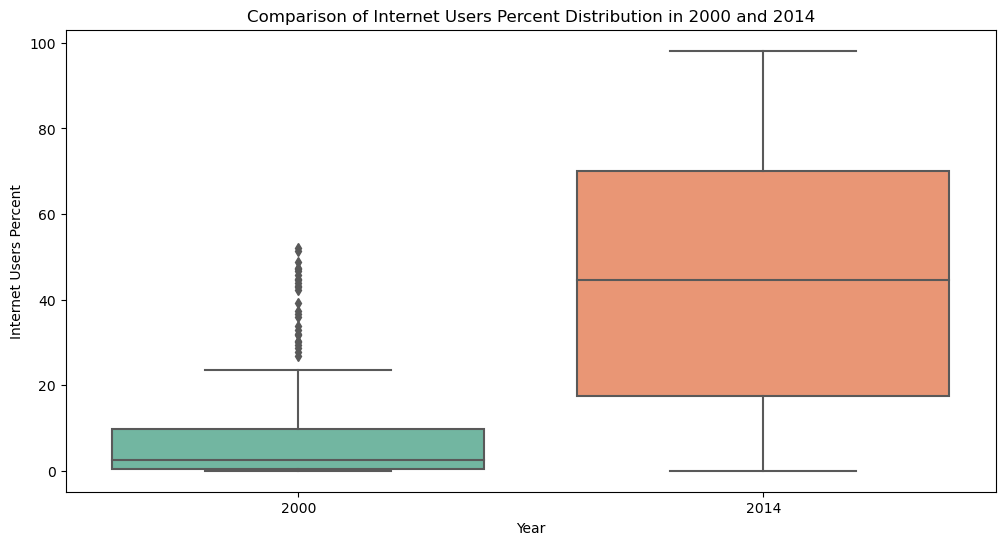

In [28]:
#18. making dataframes for 2000 and 2014
data_2000 = internet_df[internet_df['Year'] == 2000]
data_2014 = internet_df[internet_df['Year'] == 2014]
# making a boxplot to compare

plt.figure(figsize=(12, 6))
sns.boxplot(data=[data_2000['Internet_Users_Pct'], data_2014['Internet_Users_Pct']], palette="Set2")
plt.xticks([0, 1], ['2000', '2014'])
plt.title('Comparison of Internet Users Percent Distribution in 2000 and 2014')
plt.xlabel('Year')
plt.ylabel('Internet Users Percent')
plt.show()



In [ ]:
19. For how many countries was the percentage of internet users below 5% in 2014?

In [29]:
#19 A -- filtering the data to 2014
data_2014 = internet_df[internet_df['Year'] == 2014]


In [34]:
#19 B -- number of countries with > 5 percent internet usage in 2014
countries_below_5_percent = data_2014[data_2014['Internet_Users_Pct'] < 5].shape[0]

print(f"19.Answer:the number of countries with less than 5 percent internet usage in 2014 is {countries_below_5_percent}")

19.Answer:the number of countries with less than 5 percent internet usage in 2014 is 16


20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [35]:
#20. Trying with concatenate, stacking both on top of eachother first.
gdp_and_internet_use = pd.concat([gdp_df, internet_df], ignore_index=True)
print(gdp_and_internet_use)

           Country  Year  GDP_Per_Capita  Internet_Users_Pct
0      Afghanistan  2021     1517.016266                 NaN
1      Afghanistan  2020     1968.341002                 NaN
2      Afghanistan  2019     2079.921861                 NaN
3      Afghanistan  2018     2060.698973                 NaN
4      Afghanistan  2017     2096.093111                 NaN
...            ...   ...             ...                 ...
12152     Zimbabwe  1997             NaN            0.033080
12153     Zimbabwe  1996             NaN            0.016790
12154     Zimbabwe  1995             NaN            0.007684
12155     Zimbabwe  1994             NaN            0.001739
12156     Zimbabwe  1990             NaN            0.000000

[12157 rows x 4 columns]


In [36]:
#20 what happens if I don't ignore index?
gdp_and_internet_use = pd.concat([gdp_df, internet_df], ignore_index=False)
print(gdp_and_internet_use)

          Country  Year  GDP_Per_Capita  Internet_Users_Pct
0     Afghanistan  2021     1517.016266                 NaN
1     Afghanistan  2020     1968.341002                 NaN
2     Afghanistan  2019     2079.921861                 NaN
3     Afghanistan  2018     2060.698973                 NaN
4     Afghanistan  2017     2096.093111                 NaN
...           ...   ...             ...                 ...
4490     Zimbabwe  1997             NaN            0.033080
4491     Zimbabwe  1996             NaN            0.016790
4492     Zimbabwe  1995             NaN            0.007684
4493     Zimbabwe  1994             NaN            0.001739
4494     Zimbabwe  1990             NaN            0.000000

[12157 rows x 4 columns]


21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?